# Homework #1

Name: Salvatore Zerbo

Course: Math 483

Date: 04/12/2019

# Q4

For a reward function $r(x) = \frac{1}{x}$ for $x = 2, ..., 12$, the expectation value can be calculated by drawing two uniform dice rolls, x and y, on $[1, 6]$ and summing them. Taking the average of $r(x + y)$ gives the expected value for the reward function.

In [49]:
#Import and seed
from random import randint, seed
seed(30)

#Setup
n_trials = 10**7
r = 0

#Simulate 2 dice rolls and calculate r(x+y)
for i in range(n_trials):
    x = randint(1, 6)
    y = randint(1, 6)

    r += 1 / (x + y)
    
#Output expected value
print("Expected value of r(x):", r / n_trials)

Expected value of r(x): 0.16783244484844137


After $10^{7}$ trials, the simulation approximates the solution to 4 decimal places, i.e. $E[r(x)] = 0.1678$

# Q8

The random walk can be calculated through a biased coin flip. Starting at the origin, flipping heads can be set as walking 1 unit the right direction, and flipping tails can be set as walking 1 unit in the left direction. The final position is then the sum of those results.

## Part A

Final position: 8


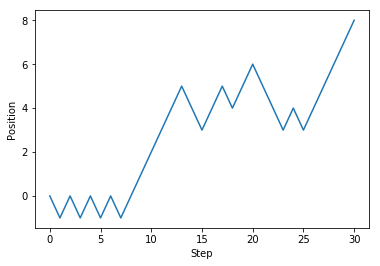

In [50]:
#Import and seed
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(30)

#Setup
n_steps = 30
P = [0.6, 0.4]
possibilities = ["Heads", "Tails"]

def random_walk(n_steps):
    '''
    Performs a random walk based on the result of
    a biased coin flip (60% heads, 40% tails). 
    Heads walks right 1 unit and tails walks left 
    1 unit.
    '''
    #Intialize arrays
    pos = [0]
    n = [0]

    #Flip coin and take steps - right = +1, left = -1
    for i in range(n_steps):
        result = np.random.choice(possibilities, replace = True, p = P)

        #Move based on results
        if result == "Heads":
            pos.append(pos[-1] + 1)
        elif result == "Tails":
            pos.append(pos[-1] - 1)
        n.append(n[-1] + 1)
        
    return n, pos

n, pos = random_walk(n_steps)
print("Final position:", pos[-1])

#Plot details
plt.xlabel("Step")
plt.ylabel("Position")
plt.plot(n, pos)
plt.show()

## Part B, C, D

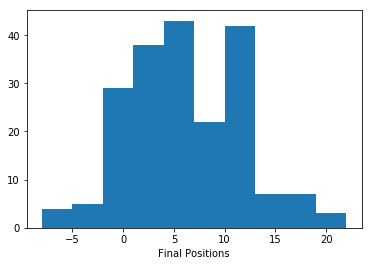

Sample mean: 5.69
Sample variance: 30.923900000000003


In [54]:
np.random.seed(30)

#Setup
n_walks = 200
positions = []

#Run desire number of random walks
for i in range(n_walks):
    n, pos = random_walk(n_steps)
    positions.append(pos[-1])

#Plot details
plt.xlabel("Final Positions")
plt.hist(positions)
plt.show()

print("Sample mean:", np.mean(positions))
print("Sample variance:", np.var(positions))

You can see the central limit theorm here, as the distribution tends to a gaussian as the number of random walks is increased.

The average for each step is $\mu = \sum\limits_{i=1}^{n} x_{i}*p(x_{i}) = (0.6 * 1 + 0.4 * -1) = 0.2$

The average final position should be $\bar x = 30*\mu = 30*(0.6 * 1 + 0.4 * -1) = 6$

The variance of the final position should be $\sigma^{2} = 30*\sum\limits_{i=1}^{n} p(x_{i})*(x_{i} - \mu)^{2} = 30*[0.6*(1 - 0.2)^{2} + 0.4*(-1 - 0.2)^{2}]$ = 28.8

# Q13

To find the probability of a true positive (test says HIV when person has HIV), we first choose a person, who will have HIV 3% of the time. Then to get the test results, we choose the results to match the person's status 98% of the time. We can then find the true positive probability by taking into account the number of true positives and the total number of times the test states positive.

In [52]:
np.random.seed(30)

#Setup
n_iters = 10**5
P_pop = [0.97, 0.03]
P_test = [0.98, 0.02]
pop_possibilities = ["Clean", "HIV"]
num_true_pos = 0
num_pos = 0

#Perform n experiments
for i in range(n_iters):
    #Choose random person
    person = np.random.choice(pop_possibilities, replace = True, p = P_pop)
    
    #Set person's status to 98% chance of selecting
    test_possibilities = [person, np.setdiff1d(pop_possibilities, person)]
    
    #Run test
    test_results = np.random.choice(test_possibilities, replace = True, p = P_test)
    
    #Count
    if test_results == "HIV":
        num_pos += 1
    if test_results == "HIV" and person == "HIV":
        num_true_pos += 1

print("Probability true positive:", num_true_pos / num_pos)
    

Probability true positive: 0.6126571840857555


About 61% of the time will the test say a person has HIV when they actually do. The other 40% of the time, it will say they have HIV when they don't.

# Q24

The Monty Hall problem can be simulated by first randomly choosing a door that has the car and a door that the contestant selects. Then the host randomly chooses a door that the contestant hasn't selected and has a sheep behind it. The contestant then randomly chooses to switch to the other door or not. The probabilities are then the number of times the contestant won divided by the total number of times for each scenario (switched or didn't switch).

In [53]:
from random import choice
seed(30)

#Setup
n_iters = 10**6
wins_nc = 0
wins_switch = 0
counts_nc = 0
counts_switch = 0
doors = ["A", "B", "C"]

#Perform n experiments
for i in range(n_iters):
    #Initial choice
    win = choice(doors)
    selected = choice(doors)

    #Get hosts choice - not open car door or contestant's door
    host = np.setdiff1d(np.setdiff1d(doors, win), selected)
    
    #If both doors have sheep, choose randomly between them
    if len(host) > 1:
        host = choice(host)

    #Remove host's door from selections
    remaining_doors = np.setdiff1d(doors, host)

    #Randomly choose to switch or not
    selected_new = choice(remaining_doors)
    
    #Didn't switch and won
    if selected_new == win and selected_new == selected:
        wins_nc += 1
        counts_nc += 1
    #Didn't switch and lost
    elif selected_new != win and selected_new == selected:
        counts_nc += 1
    #Switched and won
    elif selected_new == win and selected_new != selected:
        wins_switch += 1
        counts_switch += 1
    #Switched and lost
    elif selected_new != win and selected_new != selected:
        counts_switch += 1
    
#Calculate probabilities
prob_nc = wins_nc / counts_nc
prob_switch = wins_switch / counts_switch

print("Probability of winning if no change:", prob_nc)
print("Probability of winning if switching:", prob_switch)

Probability of winning if no change: 0.3336644368808047
Probability of winning if switching: 0.6670109055684645


As expected the probability of winning after switching doors approaches $\frac{2}{3}$ and the probability of winning after not switching doors approaches $\frac{1}{3}$.